## Classes

In [48]:
import numpy as np
import pandas as pd
class Hemming:
    def __init__(self,input,eps, *args, **kwargs):
        self.Input=input
        self.T=len(input[0])/2
        self.eps=eps
        self.W=input/2
        self.V=np.identity(len(input))-self.eps+np.identity(len(input))*self.eps

    def func(self,vect):
        for i in range(len(vect)):
            if(vect[i]<=0):
                vect[i]=0
            elif(vect[i]>=self.T):
                vect[i]=self.T
        return vect

    def res(self,vect):
        if np.count_nonzero(vect)>1 or np.count_nonzero(vect)==0:
            return "Класс не распознан"
        else:
            return "Объект принадлежит классу %d"%(np.flatnonzero(vect)[0]+1)
                
    def compute(self,vect):
        y1=self.func(np.dot(self.W,vect)+self.T)
        y2=self.func(np.dot(self.V,y1))
        it=0
        while np.linalg.norm(y2-y1)>0.00001:
            y1=y2
            y2=self.func(np.dot(self.V,y1))
            it+=1
        print("Итераций %d\n"%(it))
        print(pd.DataFrame(y1))      
        print(pd.DataFrame(y2))
        return self.res(y2)

## Work

In [23]:
import sys
from Classes import *
input=np.array([
    [1,-1,1,-1,1,-1,1,-1,1],
    [-1,1,-1,1,1,1,-1,1,-1],
    [1,1,1,1,-1,1,1,1,1]])

test=Hemming(input,0.3)

In [24]:
vect=np.array([1,-1,-1,-1,1,-1,1,-1,1])
test.compute(vect)

'Объект принадлежит классу 1'

In [25]:
vect1=np.array([1,1,1,-1,-1,-1,1,1,1])
test.compute(vect1)

'Класс не распознан'

## Indexes

### Входные значения

In [26]:
indexes=np.array([
    #0
    [1, 1, 1, 1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1, 1, 1, 1,1],
    #1
    [-1,-1,-1,-1,1,
     -1,-1,-1,1,1,
     -1,-1,1,-1,1,
     -1,1,-1,-1,1,
      1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1],
    #2
    [ 1,1,1,1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
     1,1,1,1,1],
    #3
    [
      1,1,1,1,1,
     -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
      1,1,1,1,1,
     -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
      1, -1, -1, -1,-1],
    #4
    [   1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
      1,1,1,1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1
    ],
    #5
      [1, 1, 1, 1,1,
     1,-1,-1,-1,-1,
     1,-1,-1,-1,-1,
     1,-1,-1,-1,-1,
     1,1,1,1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     1, 1, 1, 1,1],
    #6
    [-1,-1,-1,-1,1,
     -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
      1,1,1,1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1, 1, 1, 1,1],
    #7
    [1,1,1,1,1,
     -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
         1,-1,-1,-1,-1,
     1,-1,-1,-1,-1,
     1,-1,-1,-1,-1,
     1,-1,-1,-1,-1,
     1, -1, -1, -1,-1],
    #8
    [1, 1, 1, 1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,1,1,1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1, 1, 1, 1,1],
    #9
    [1, 1, 1, 1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,1,1,1,1,
       -1,-1,-1,1,-1,
     -1,-1,1,-1,-1,
     -1,1,-1,-1,-1,
      1, -1, -1, -1,-1]
    
])

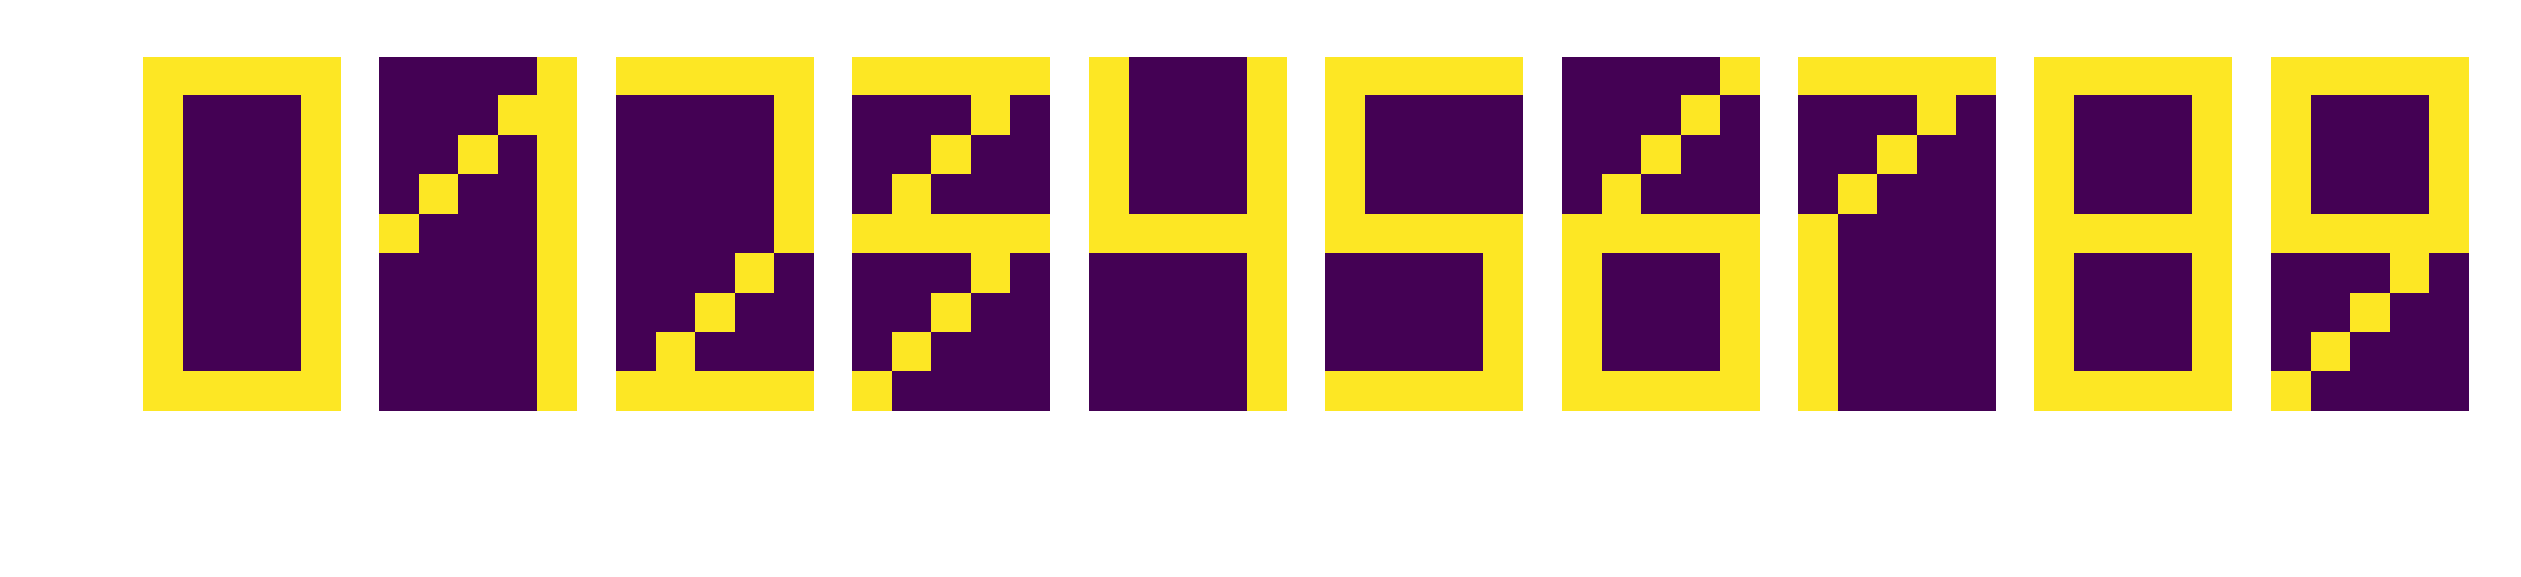

In [27]:
import matplotlib.pyplot as pl
%matplotlib inline
fig,axs=pl.subplots(1,10,dpi=500)
for i in range(10):
    axs[i].imshow(indexes[i].reshape((9,5)))
    axs[i].axis("off")
pl.show()

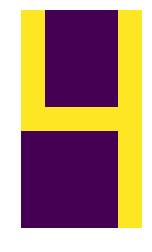

In [35]:
check= np.array( [   1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
     1,-1,-1,-1,1,
      1,1,1,1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1,
     -1,-1,-1,-1,1
    ])
pl.imshow(check.reshape((9,5)))
pl.axis("off")
pl.show()

In [49]:
net=Hemming(indexes,0.1)
print("%s\n"%net.compute(indexes[3]))

Итераций 10

          0
0  0.000000
1  0.000001
2  0.000001
3  0.000001
4  0.000001
5  0.000001
6  0.000001
7  0.000001
8  0.000001
9  0.000001
              0
0  0.000000e+00
1  2.560000e-07
2  2.560000e-07
3  2.560000e-07
4  2.560000e-07
5  2.560000e-07
6  2.560000e-07
7  2.560000e-07
8  2.560000e-07
9  2.560000e-07
Класс не распознан

